### **To View the `HR_doc.pdf` contents**

- Go to Extensions: Click on the Extensions icon on the left sidebar or press `Ctrl+Shift+X`.
- Search for an Excel Viewer Extension: Type "PDF Viewer" in the search bar at the top of the Extensions view.
- Install the Extension: Click on the extension you prefer and then click the green "Install" button.
- View the Data: The installed extension should display the contents of the PDF Document in a readable format within the VS Code editor.

By following these steps, you can view the `HR_doc.pdf`  directly within Visual Studio Code.

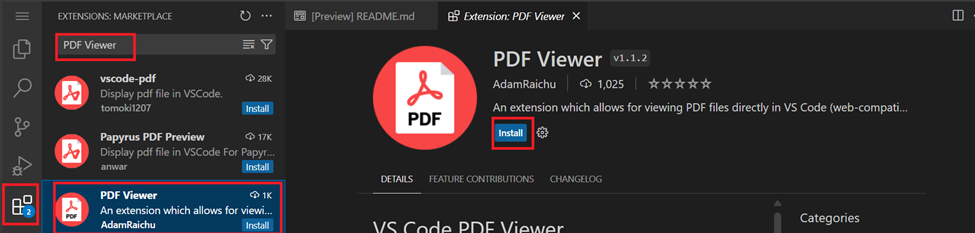

#### **Step 1: Extracting and Splitting Text from PDF Documents using LangChain**

##### **Code:**

```python
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import TokenTextSplitter

text_splitter = TokenTextSplitter(chunk_size=1024, chunk_overlap=0)
loader = PyPDFLoader("HR_doc.pdf")
raw_chunks = loader.load_and_split(text_splitter)
```

##### **Explanation:**

This code snippet demonstrates how to use the LangChain library to load a PDF document and split its text into manageable chunks. This is particularly useful for processing large documents where handling smaller sections of text is more efficient for tasks like analysis or natural language processing.


1. Import the PyPDFLoader class:
   ```python
   from langchain_community.document_loaders import PyPDFLoader
   ```
   - This imports the `PyPDFLoader` class from the `langchain_community.document_loaders` module.
   -  We need `PyPDFLoader` to handle the loading and reading of PDF documents, which is essential for accessing the text content within the PDF.

2. Import the TokenTextSplitter class:
   ```python
   from langchain_text_splitters import TokenTextSplitter
   ```
   - This imports the `TokenTextSplitter` class from the `langchain_text_splitters` module.
   -  The `TokenTextSplitter` is required to break down the document text into smaller, manageable chunks. This is important for efficiently processing and analyzing the text, especially for tasks that perform better on smaller text segments.

3. Create an instance of TokenTextSplitter:
   ```python
   text_splitter = TokenTextSplitter(chunk_size=1024, chunk_overlap=0)
   ```
   - Here, we create an instance of `TokenTextSplitter` with a `chunk_size` of 1024 tokens and no overlap (`chunk_overlap=0`).
   -  By specifying a chunk size and overlap, we ensure that the text is divided into consistent, non-overlapping sections. This makes subsequent text processing tasks more efficient and manageable.

4. Create an instance of PyPDFLoader:
   ```python
   loader = PyPDFLoader("HR_doc.pdf")
   ```
   - We create an instance of `PyPDFLoader` and pass the filename `"HR_doc.pdf"`.
   -  This instance is responsible for loading the content of the specified PDF document, which is the first step in extracting and processing the text from the PDF.

5. Load and split the PDF document:
   ```python
   raw_chunks = loader.load_and_split(text_splitter)
   ```
   - This line loads the content of the specified PDF document using the `loader` and then splits it into chunks using the `text_splitter`. The resulting chunks are stored in the `raw_chunks` variable.
   -  Combining the loading and splitting steps in one command simplifies the workflow. It ensures that the PDF text is immediately split into manageable sections, making it ready for further processing or analysis.
   
This code snippet loads an HR PDF document and splits its text into chunks of 1024 tokens each using the LangChain library. This approach makes it easier to process and analyze the text in smaller, manageable parts.

#### **TRY OUT 1**

In [ ]:
#Extracting and Splitting Text from PDF Documents using LangChain




The raw chunks from the `PyPDFLoader` output are `Document` objects with two main components:

1. page_content: The extracted text from a specific page or section of the PDF.
2. metadata: Information about the text chunk, including the source file name and page number.

### Importance

- Text Processing: Breaks large documents into manageable sections for analysis and NLP tasks.
- Metadata Utilization: Tracks the origin of each text chunk for referencing and organization.


NOTE: Try printing the raw chunks and see the what it contains



``python
print(raw_chunks)
``

In [ ]:
#print the raw_chunks

#### **Step 2: Encoding Text Content into Embeddings for Synthetic QA Generation**


##### **Code :**

```python
from sentence_transformers import SentenceTransformer

# Initialize the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# List to store content
content = []
print(f"Raw chunks;{raw_chunks}")
# Process each raw_chunk and print in a presentable manner
for rc in raw_chunks:
    content.append(rc.page_content)
    print("Chunk Information:")
    print(f"Source: {rc.metadata['source']}, Page: {rc.metadata['page']}")
    print("Page Content:")
    print(rc.page_content)
    print("-" * 80)  #This is to see each chunk in a presentable manner
# Encode the content to get embeddings
embeddings = model.encode(content)

```

##### **Explanation:**



In the process of generating synthetic question-answer (QA) pairs from documents, this code snippet converts text content into embeddings. These embeddings are numerical representations of the text, which can then be used for various natural language processing tasks, including the generation of QA pairs.

1. Import the SentenceTransformer class:
   ```python
   from sentence_transformers import SentenceTransformer
   ```
   - This imports the `SentenceTransformer` class from the `sentence_transformers` module.
   - `SentenceTransformer` is a powerful tool for converting text into embeddings. These embeddings capture the semantic meaning of the text, making it easier to perform various NLP tasks, including similarity comparisons and QA generation.

2. Initialize the SentenceTransformer model:
   ```python
   model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
   ```
   - This line initializes the `SentenceTransformer` model with the pre-trained model `'sentence-transformers/all-MiniLM-L6-v2'`.
   - Using a pre-trained model like `all-MiniLM-L6-v2` allows us to leverage a powerful transformer model that has been trained on a large corpus of text. This ensures that the embeddings generated are accurate and capture the nuances of the text.

3. Extract and print text content from raw chunks:
   ```python
   # List to store content
   content = []
   print(f"Raw chunks: {raw_chunks}")
   # Process each raw_chunk and print in a presentable manner
   for rc in raw_chunks:
       content.append(rc.page_content)
       print("Chunk Information:")
       print(f"Source: {rc.metadata['source']}, Page: {rc.metadata['page']}")
       print("Page Content:")
       print(rc.page_content)
       print("-" * 80)  # Separator between chunks
   ```
   - This section creates a list of text content by extracting the `page_content` attribute from each element in `raw_chunks`.
   - It also prints detailed information about each chunk, including the source and page number from the `metadata` attribute, and the actual `page_content`.
   - Extracting and printing the text content from the raw chunks helps verify the data being processed. This step ensures that we have a list of text strings ready to be converted into embeddings.

4. Encode the text content into embeddings:
   ```python
   # Encode the content to get embeddings
   embeddings = model.encode(content)
   ```
   - This line encodes the list of text content into embeddings using the `model`.
   - Converting text into embeddings transforms the text into a numerical format that can be used for further processing. These embeddings are crucial for generating synthetic QA pairs, as they provide a way to measure the semantic similarity and relevance of different text segments.


This code snippet converts text content from a document into embeddings using a pre-trained SentenceTransformer model. The key steps involve:

- Initialization: Setting up the SentenceTransformer model for encoding.
- Extraction: Retrieving the `page_content` from each `Document` object within `raw_chunks`.
- Printing: Displaying the content and metadata for verification.
- Encoding: Transforming the extracted text into embeddings.

These embeddings are essential for generating synthetic QA pairs, as they capture the semantic meaning of the text, enabling various NLP tasks. The process highlights the importance of extracting the `page_content` from each document chunk and converting this content into a format suitable for further analysis and QA generation.

#### **TRY OUT 2**

In [ ]:
#Encoding Text Content into Embeddings for Synthetic QA Generation

#### **Step 3: Randomly Selecting Embeddings and Contexts for Synthetic QA Generation**

##### **Code:**

```python
import random
reference_index = random.randint(0, len(embeddings) - 1)
reference_embedding = embeddings[reference_index]
contexts = [content[reference_index]]
```

##### **Explanation:**


In the process of generating synthetic question-answer (QA) pairs from documents, this code snippet is used to randomly select an embedding and its corresponding context. We have a list of embeddings (`embeddings`) and a corresponding list of content chunks (`content`). 
This approach ensures that each iteration randomly selects a different embedding and its associated context from the document chunks. For learning purposes, we focus on generating QA pairs based on one randomly selected content and its embedding. To generate QA pairs for all content chunks in the `content` list, you would iterate through each content and its corresponding embedding.

Generating QA pairs involves formulating questions and answers based on the selected context, leveraging the `reference_embedding` and `contexts` list for generating diverse and informative QA pairs.

1. Import the random module:
   ```python
   import random
   ```
   -  This imports the `random` module from Python's standard library.
   -  The `random` module provides functions for generating random numbers, which is essential for randomly selecting an index in the subsequent steps. Random selection helps ensure diversity and prevents bias in synthetic data generation.

2. Generate a random index:
   ```python
   reference_index = random.randint(0, len(embeddings) - 1)
   ```
   -  This line generates a random integer between 0 and the length of the `embeddings` list minus one.
   -  By generating a random index within the bounds of the `embeddings` list, we can select a random embedding. This randomness ensures that the selection process is unbiased and that the synthetic QA pairs generated cover a broad range of contexts.

3. Select the reference embedding:
   ```python
   reference_embedding = embeddings[reference_index]
   ```
   -  This line selects the embedding at the randomly generated index from the `embeddings` list.
   -  By selecting a random embedding, we can base our synthetic QA pair generation on a diverse set of reference points. This diversity is crucial for generating varied and comprehensive synthetic QA pairs that reflect different parts of the document.

4. Select the corresponding context:
   ```python
   contexts = [content[reference_index]]
   ```
   -  This line creates a list containing the context (from the `content` list) that corresponds to the randomly selected embedding.
   -  Ensuring that the context aligns with the randomly chosen embedding maintains the relationship between data points. This alignment is essential for accurately generating synthetic QA pairs that are contextually relevant and meaningful.


This code snippet randomly selects an embedding and its corresponding context to generate synthetic QA pairs from a document. This approach ensures diversity and prevents bias, leading to more comprehensive and varied QA pairs.


#### **TRY OUT 3**

In [ ]:
#Randomly Selecting Embeddings and Contexts for Synthetic QA Generation

Please print the `contexts` variable to view the randomly selected context. If the context seems too short, rerun the preceding code cell to select a different context. A larger context will yield more generated QA pairs.

Code to print context is 

```python
print(contexts)
```

#### **Step 4: Finding Similar Embeddings for Enhanced QA Pair Generation**

##### **Code:**

```python
import numpy as np

similarity_threshold = 0.8
similar_indices = []
for i, embedding in enumerate(embeddings):    
    product = np.dot(reference_embedding, embedding)
    norm = np.linalg.norm(reference_embedding) * np.linalg.norm(embedding)
    similarity = product / norm
    if similarity >= similarity_threshold:
        similar_indices.append(i)

for i in similar_indices:
    contexts.append(content[i])
```

##### **Explanation:**

Once the `refernce embedding` is chosen, the next step involves selecting all `embeddings` that are similar to the `refernce embedding`. This is achieved through a similarity search, where contexts with an 80% similarity to the `refernce embedding` are identified and collected. This ensures that the generated QA pairs are not only diverse but also maintain relevance and coherence with respect to the selected reference context.

1. Import the numpy library:
   ```python
   import numpy as np
   ```
   -  This imports the `numpy` library and gives it the alias `np`.
   -  NumPy provides efficient numerical operations and array handling, which are essential for calculating the similarity between embeddings.

2. Set the similarity threshold:
   ```python
   similarity_threshold = 0.8
   ```
   -  This sets a threshold value of 0.8 for similarity.
   -  The threshold determines the minimum similarity score required for embeddings to be considered similar. A threshold of 0.8 ensures that only closely related text segments are selected.

3. Initialize a list for similar indices:
   ```python
   similar_indices = []
   ```
   -  This creates an empty list to store the indices of embeddings that meet the similarity threshold.
   -  This list will keep track of the positions of similar embeddings, allowing us to easily retrieve their corresponding contexts later.

4. Loop through the embeddings:
   ```python
   for i, embedding in enumerate(embeddings):    
   ```
   -  This starts a loop that iterates over each embedding and its index in the `embeddings` list.
   -  Iterating through the embeddings allows us to compare each one against the reference embedding to find similar ones.

5. Calculate the dot product of embeddings:
   ```python
   product = np.dot(reference_embedding, embedding)
   ```
   -  This calculates the dot product between the reference embedding and the current embedding.
   -  The dot product is a key component in calculating the cosine similarity between two vectors, which measures their similarity.

6. Calculate the norm of the embeddings:
   ```python
   norm = np.linalg.norm(reference_embedding) * np.linalg.norm(embedding)
   ```
   -  This calculates the product of the norms (magnitudes) of the reference embedding and the current embedding.
   -  The norm is used to normalize the dot product, ensuring that the similarity score is between -1 and 1, representing cosine similarity.

7. Calculate the cosine similarity:
   ```python
   similarity = product / norm
   ```
   -  This divides the dot product by the product of the norms to obtain the cosine similarity.
   -  Cosine similarity provides a measure of how similar two vectors are, based on their orientation in space. It's a common metric for comparing text embeddings.

8. Check if similarity meets the threshold:
   ```python
   if similarity >= similarity_threshold:
       similar_indices.append(i)
   ```
   -  This checks if the calculated similarity is greater than or equal to the threshold. If it is, the index `i` is appended to `similar_indices`.
   -  This step filters out embeddings that are not similar enough, ensuring that only relevant text segments are considered for QA generation.

9. Append corresponding contexts:
   ```python
   for i in similar_indices:
       contexts.append(content[i])
   ```
   -  This loops through the indices of similar embeddings and appends their corresponding contexts to the `contexts` list.
   -  Collecting the contexts of similar embeddings ensures that we have a rich set of related text segments, which is crucial for generating accurate and contextually relevant synthetic QA pairs.


This code snippet identifies embeddings similar to a reference embedding and collects their corresponding contexts. By calculating the cosine similarity between embeddings and using a similarity threshold, it ensures that only closely related text segments are included, enhancing the quality of synthetic QA pairs.

#### **TRY OUT 4**

In [ ]:
#Finding Similar Embeddings for Enhanced QA Pair Generation

#### **Step 5: Creating openai client**

##### **Code:**

```python
from openai_python_client import get_openai_client
client = get_openai_client()

```

##### **Explanation:**


The line of code `client = get_openai_client()` does something quite powerful in just one line. Let's break it down:

- Client: In programming, a "client" often refers to a piece of software that communicates with a server or external service. Here, `client` is a variable name chosen to represent the tool or interface we use to interact with OpenAI's services.

- Get OpenAI Client: This part of the code calls a function named `get_openai_client()` from our custom package. This function is responsible for setting up everything needed to connect and communicate with OpenAI's services.

For context, here's how you would normally set up an OpenAI client without this custom package:

```python
from openai import OpenAI
client = OpenAI(api_key="YOUR_API_KEY")
```
In this standard setup, you import the OpenAI class from the openai package and then create a client instance by passing your API key. However, with the custom get_openai_client() function, all these steps are encapsulated in one line, streamlining the process.

So, with this one line of code, we're essentially getting a special tool (the OpenAI client) that allows our program to talk to OpenAI's servers and access their powerful artificial intelligence tools and models, without manually specifying the API key and other configurations every time.



- =: The equal sign (`=`) is an assignment operator in Python. It assigns the value returned by `get_openai_client()` to the variable `client`.

- One Line of Code: The entire process of obtaining access to OpenAI's tools is accomplished in just one line of code. This makes it simple and convenient for developers to start using OpenAI's services in their projects without having to write a lot of complex code.




So, Here, we're essentially getting a special tool (the OpenAI client) that allows our program to talk to OpenAI's servers and access their powerful artificial intelligence tools and models.

#### **TRY OUT 5**

In [ ]:
#Creating openai client

#### **Step 6: Setting up prompt template**

##### **Code:**

```python
prompt = f"""I want you act as a copywriter. Based on the given context, 
which is list of strings, please generate a list of JSON objects 
with an `input` key. The `input` can either be a question or a 
statement that can be addressed by the given context.

contexts:
{contexts}"""
```

##### **Explanation:**


This code snippet prepares a prompt for generating synthetic question-answer pairs from a given list of contexts. Here, the "contexts"(which is a list) refer to both the text segments that are similar to the `reference embedding` and the text segment represented by the `reference embedding` itself..The prompt instructs a model to act as a copywriter and generate JSON objects containing questions or statements based on the provided contexts. This is useful for creating training data for natural language processing tasks.


1. Create a formatted prompt string:
   ```python
   prompt = f"""I want you act as a copywriter. Based on the given context, 
   which is list of strings, please generate a list of JSON objects 
   with an `input` key. The `input` can either be a question or a 
   statement that can be addressed by the given context.

   contexts:
   {contexts}"""
   ```
   -  This block of code creates a multi-line formatted string (`prompt`) that contains instructions for generating synthetic QA pairs based on the provided contexts.
   -  The formatted string serves as a clear and detailed instruction set for a model (such as an AI language model) to generate relevant questions or statements based on the given contexts. Using `f"""...{contexts}"""` allows the contexts to be dynamically inserted into the prompt, ensuring that the generated questions or statements are directly related to the specific content.

#### Detailed Explanation of Prompt Components:

- Instruction to act as a copywriter:
  ```python
  "I want you to act as a copywriter."
  ```
  -  This line instructs the model to assume the role of a copywriter.
  -  Setting a specific role for the model helps it understand the context in which it should generate responses, leading to more accurate and relevant outputs.

- Generate JSON objects with an `input` key:
  ```python
  "Based on the given context, which is a list of strings, please generate a list of JSON objects with an `input` key."
  ```
  -  This line specifies that the model should create a list of JSON objects, each containing an `input` key.
  -  Defining the structure of the expected output (JSON objects with an `input` key) ensures that the generated data is in a usable format for further processing or training.

- Define `input` as a question or statement:
  ```python
  "The `input` can either be a question or a statement that can be addressed by the given context."
  ```
  -  This line clarifies that the `input` key's value should be either a question or a statement.
  -  Providing clear guidelines on what constitutes a valid `input` ensures that the generated QA pairs are relevant and useful for training or testing purposes.

- Insert the list of contexts:
  ```python
  "contexts:\n{contexts}"
  ```
  -  This line inserts the list of contexts into the prompt.
  -  Including the actual contexts in the prompt allows the model to generate questions or statements that are directly related to the provided content, making the QA pairs contextually accurate.


This code snippet prepares a prompt for generating synthetic QA pairs by instructing a model to act as a copywriter and create JSON objects with questions or statements based on provided contexts. This approach ensures that the generated data is relevant and structured, suitable for use in training NLP models.

#### **TRY OUT 6**

###### **Exceute the cell below**

In [ ]:
#Setting up prompt template
prompt = f"""I want you act as a copywriter. Based on the given context, 
which is list of strings, please generate a list of JSON objects 
with an `input` key. The `input` can either be a question or a 
statement that can be addressed by the given context.

contexts:
{contexts}"""

#### **Step 7: Defining custom function to get the response from the model**

##### **Code:**

```python
def get_response(prompt):
    completion = client.chat.completions.create(
        model="gpt-4-1106-preview",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )
    response = completion.choices[0].message.content
    return response
```


##### **Explanation:**


This function interacts with OpenAI's GPT-4 model to generate a response to a given prompt. It structures the input to simulate a conversation where the user's prompt is responded to by a virtual assistant model.


1. Function Definition (`def get_response(prompt):`):
   - Defines a function named `get_response` that takes a single argument `prompt`, which represents the user's input to generate a response.

2. OpenAI API Call (`completion = client.chat.completions.create(...)`):
   - Initiates a request to the OpenAI API (`client.chat.completions.create`) to generate a response using the specified model (`gpt-4-1106-preview`).

3. Message Structuring (`messages=[...]`):
   - Constructs a list of messages that simulate a conversation:
     - The first message (`{"role": "system", "content": "You are a helpful assistant."}`) sets the system's role to convey a predefined message.
     - The second message (`{"role": "user", "content": prompt}`) sets the user's role and includes the actual prompt provided as an argument to the function.

4. Response Extraction (`response = completion.choices[0].message.content`):
   - Retrieves the generated response from the API's completion choices. It assumes the first choice (`completion.choices[0]`) and extracts the content of the message.

5. Return Statement (`return response`):
   - Returns the generated response back to the caller of the `get_response` function.

This function uses OpenAI's GPT-4 model to simulate a conversation. It structures input messages, sends them to the model, retrieves the generated response, and returns it for further use.



#### **TRY OUT 7**

In [ ]:
 #Defining custom function to get the response from the model

#### **Step 8: Generating Responses for Synthetic QA Pairs**


##### **Code:**

```python
response = get_response(prompt)
```

##### **Explanation:**


In the process of generating synthetic question-answer (QA) pairs, this code snippet sends a previously prepared prompt to a function or model (e.g., a language model) to generate responses. This step is crucial for obtaining the actual synthetic QA pairs based on the given contexts.


1. Send the prompt to the response-generating function:
   ```python
   response = get_response(prompt)
   ```
   -  This line calls the `get_response` function, passing the `prompt` as an argument, and stores the generated response in the `response` variable.
   -  The `get_response` function interacts with a language model or API to generate responses based on the provided prompt. This step is essential for obtaining the synthetic QA pairs that were requested in the prompt.


This code snippet sends a prepared prompt to a response-generating function to obtain synthetic question-answer pairs. It captures the generated responses in a variable for further use.

#### **TRY OUT 8**

In [ ]:
#Generating Responses for Synthetic QA Pairs

You can see the response by printing it

```python
print(response)
```

#### **Step 9: Parsing and Cleaning Synthetic QA Data from Response**

##### **Code:**

```python
import re 
import json

start_index = response.find('[')
end_index = response.rfind(']') + 1
json_part = response[start_index:end_index]

pattern =  re.compile(r'\{\s*"input"\s*:\s*".*?"\s*\}')

# Find all matches in the input text
matches = pattern.findall(json_part)

# Clean and construct the JSON array
clean_json_qa_str = '[' + ','.join(matches) + ']'

# Parse the cleaned JSON string
try:
    json_qa_pairs = json.loads(clean_json_qa_str)
    print(json.dumps(json_qa_pairs, indent=2))
except json.JSONDecodeError as e:
    print(f"JSONDecodeError: {e}")
```

##### **Explanation:**


As you saw, the response from the model is not in a proper JSON format initially; it includes additional information beyond the JSON structure. Therefore, the first step is to extract only the JSON part from the response..This code snippet processes the response obtained from generating synthetic question-answer (QA) pairs based on a prompt. It extracts the JSON part from the response, cleans it by filtering out specific patterns, constructs a valid JSON array of QA pairs, and then parses and prints the cleaned JSON data.

1. Find the JSON part in the response:
   ```python
   start_index = response.find('[')
   end_index = response.rfind(']') + 1
   json_part = response[start_index:end_index]
   ```
   -  These lines find the substring in the `response` that starts with `[` and ends with `]`, capturing the JSON part.
   -  This isolates the JSON data within the response, which contains the generated synthetic QA pairs.

2. Define a regex pattern for matching QA pairs:
   ```python
   pattern = re.compile(r'\{\s*"input"\s*:\s*".*?"\s*\}')
   ```
   -  This creates a regex pattern to match JSON objects with a specific structure (`{"input": "..."}`).
   -  The pattern helps identify and extract QA pairs from the JSON part of the response.

3. Find all matches using the regex pattern:
   ```python
   matches = pattern.findall(json_part)
   ```
   -  This finds all occurrences of the regex pattern within `json_part`.
   -  It collects all QA pairs that match the specified structure into the `matches` list.

4. Clean and construct the JSON array:
   ```python
   clean_json_qa_str = '[' + ','.join(matches) + ']'
   ```
   -  This constructs a valid JSON array string by joining the matched QA pairs with commas and enclosing them in square brackets.
   -  It prepares the string representation of the JSON array for parsing into Python objects.

5. Parse the cleaned JSON string:
   ```python
   try:
       json_qa_pairs = json.loads(clean_json_qa_str)
       print(json.dumps(json_qa_pairs, indent=2))
   except json.JSONDecodeError as e:
       print(f"JSONDecodeError: {e}")
   ```
   -  It attempts to parse the cleaned JSON string (`clean_json_qa_str`) into Python objects (`json_qa_pairs`). If successful, it prints the JSON formatted with indentation for readability. If parsing fails (e.g., due to invalid JSON), it catches the `JSONDecodeError` and prints an error message.
   -  This final step converts the cleaned JSON string into a Python list of dictionaries (representing QA pairs) for further processing or storage.


This code snippet extracts, cleans, and parses synthetic question-answer pairs from a response obtained by generating QA pairs based on a prompt. It ensures that the extracted data is in a structured JSON format, ready for use in  evaluation tasks.

#### **TRY OUT 9**

In [ ]:
#Parsing and Cleaning Synthetic QA Data from Response

#### **Step 10: Defining prompt templates to evolve our query**

We need to refine extracted questions into higher-quality ones using two prompt templates: `multi_context_template` and `reasoning_template`. These templates are designed to elevate existing questions through thoughtful revision and enhancement.

```python
multi_context_template = """
I want you to rewrite the given `input` so that it requires readers to use information from all elements in `Context`.

1. `Input` should require information from all `Context` elements. 
2. `Rewritten Input` must be concise and fully answerable from `Context`. 
3. Do not use phrases like 'based on the provided context.'
4. `Rewritten Input` should not exceed 15 words.

Context: {contexts}
Input: {original_input}
Rewritten Input:
"""

reasoning_template = """
I want you to rewrite the given `input` so that it explicitly requests multi-step reasoning.

1. `Rewritten Input` should require multiple logical connections or inferences.
2. `Rewritten Input` should be concise and understandable.
3. Do not use phrases like 'based on the provided context.'
4. `Rewritten Input` must be fully answerable from `Context`.
5. `Rewritten Input` should not exceed 15 words.

Context: {contexts}
Input: {original_input}
Rewritten Input:
"""

hypothetical_scenario_template = """
I want you to rewrite the given `input` to incorporate a hypothetical or speculative scenario.

1. `Rewritten Input` should encourage applying knowledge from `Context` to deduce outcomes.
2. `Rewritten Input` should be concise and understandable.
3. Do not use phrases like 'based on the provided context.'
4. `Rewritten Input` must be fully answerable from `Context`.
5. `Rewritten Input` should not exceed 15 words.

Context: {contexts}
Input: {original_input}
Rewritten Input:
"""
```

###### **Exceute the below cell**

In [ ]:
#Defining prompt templates to evolve our query
multi_context_template = """
I want you to rewrite the given `input` so that it requires readers to use information from all elements in `Context`.

1. `Input` should require information from all `Context` elements. 
2. `Rewritten Input` must be concise and fully answerable from `Context`. 
3. Do not use phrases like 'based on the provided context.'
4. `Rewritten Input` should not exceed 15 words.

Context: {contexts}
Input: {original_input}
Rewritten Input:
"""

reasoning_template = """
I want you to rewrite the given `input` so that it explicitly requests multi-step reasoning.

1. `Rewritten Input` should require multiple logical connections or inferences.
2. `Rewritten Input` should be concise and understandable.
3. Do not use phrases like 'based on the provided context.'
4. `Rewritten Input` must be fully answerable from `Context`.
5. `Rewritten Input` should not exceed 15 words.

Context: {contexts}
Input: {original_input}
Rewritten Input:
"""

hypothetical_scenario_template = """
I want you to rewrite the given `input` to incorporate a hypothetical or speculative scenario.

1. `Rewritten Input` should encourage applying knowledge from `Context` to deduce outcomes.
2. `Rewritten Input` should be concise and understandable.
3. Do not use phrases like 'based on the provided context.'
4. `Rewritten Input` must be fully answerable from `Context`.
5. `Rewritten Input` should not exceed 15 words.

Context: {contexts}
Input: {original_input}
Rewritten Input:
"""


#### **Step 11: Applying Evolution Templates for Input Refinement**

##### **Code:**

```python
evolution_templates = [multi_context_template, reasoning_template, hypothetical_scenario_template]

# Number of evolution steps to apply
num_evolution_steps = 3
```

##### **Explanation:**


This code initializes a list of templates (`evolution_templates`) used for evolving and refining input statements. Each template is designed to guide the rewriting process based on specific criteria such as incorporating multiple contexts, logical reasoning, or hypothetical scenarios. The `num_evolution_steps` variable determines how many times these templates will be applied to refine the input statements.


1. Initialize the list of evolution templates:
   ```python
   evolution_templates = [multi_context_template, reasoning_template, hypothetical_scenario_template]
   ```
   -  This creates a list (`evolution_templates`) containing three different templates (`multi_context_template`, `reasoning_template`, `hypothetical_scenario_template`) used for evolving input statements.
   -  Each template provides specific guidelines for rewriting inputs, ensuring they meet different criteria such as requiring information from all contexts, encouraging logical reasoning, or exploring hypothetical scenarios.

2. Specify the number of evolution steps:
   ```python
   num_evolution_steps = 3
   ```
   -  This variable (`num_evolution_steps`) sets the number of times the evolution templates will be applied to refine the input statements.
   -  By defining `num_evolution_steps`, the code determines the depth or intensity of the input refinement process. More steps generally mean more iterations of rewriting and refinement based on the templates.


This code snippet sets up templates (`evolution_templates`) for evolving input statements through multiple refinement steps (`num_evolution_steps`). Each template guides the rewriting process to ensure that the input statements are concise, fully answerable from provided contexts, and tailored to specific criteria like incorporating multiple contexts or logical reasoning.

#### **TRY OUT 11**

In [ ]:
#Applying Evolution Templates for Input Refinement

#### **Step 12: Evolving Queries Through Template Refinement**

##### **Code:**

```python
def evolve_queries(questions, context, steps):
    evolved_questions = []
    for question_dict in questions:
        original_input = question_dict["input"]
        current_input = original_input
        for i in range(steps):
            # Choose a random template from the list
            chosen_template = evolution_templates[i]

            # Replace the placeholders with the current context and input
            evolved_prompt = chosen_template.format(contexts=context, original_input=current_input)
            response = get_response(evolved_prompt)

            # Assuming response is a list of AIMessage objects, we extract the text
            current_input = response.strip()
        
        # Append the evolved question to the list
        evolved_questions.append({"input": current_input})
    
    return evolved_questions
```

##### **Explanation:**


This function (`evolve_queries`) takes a list of questions, applies a series of evolution steps using predefined templates (`evolution_templates`), and refines each question based on the provided context. It iterates through each question, applies multiple template refinements (`steps`), and collects the evolved questions in a list (`evolved_questions`). This approach is useful for generating varied and refined versions of input questions tailored to specific criteria set by the templates.


1. Define the function `evolve_queries`:
   ```python
   def evolve_queries(questions, context, steps):
   ```
   -  This function takes three parameters: `questions` (a list of dictionaries where each dictionary contains an `"input"` key), `context` (additional information or context to be incorporated into the templates), and `steps` (the number of evolution steps to apply to each question).
   -  The function is designed to refine and evolve input questions by applying multiple iterations of template-based transformations (`steps`), ensuring that the questions are well-structured and varied.

2. Initialize an empty list for evolved questions:
   ```python
   evolved_questions = []
   ```
   -  This creates an empty list (`evolved_questions`) to store the refined questions after each iteration.
   -  The list accumulates the output of the evolutionary process, containing progressively refined versions of the input questions.

3. Iterate through each question dictionary:
   ```python
   for question_dict in questions:
   ```
   -  This loop iterates through each dictionary (`question_dict`) in the `questions` list.
   -  It enables the function to process each input question individually, applying the evolution steps defined by the templates to refine each one.

4. Extract the original input from the question dictionary:
   ```python
   original_input = question_dict["input"]
   ```
   -  This line retrieves the original input question from the current `question_dict`.
   -  It initializes `original_input`, which serves as the starting point for applying template-based refinements in subsequent steps.

5. Iterate through the specified number of evolution steps:
   ```python
   for i in range(steps):
   ```
   -  This nested loop iterates `steps` times, representing the number of evolutionary transformations to apply to the input question.
   -  Each iteration applies a different template (`evolution_templates[i]`) to refine the current input question (`current_input`), progressively enhancing its structure and content based on predefined criteria.

6. Choose a random template from the list of evolution templates:
   ```python
   chosen_template = evolution_templates[i]
   ```
   -  This line selects a template (`chosen_template`) from the list of `evolution_templates` based on the current iteration (`i`).
   -  It ensures that each evolutionary step applies a different template, which guides the rewriting process according to specific rules (e.g., incorporating multiple contexts, logical reasoning, hypothetical scenarios).

7. Replace placeholders in the chosen template with current context and input:
   ```python
   evolved_prompt = chosen_template.format(contexts=context, original_input=current_input)
   ```
   -  This line substitutes placeholders (`{contexts}` and `{original_input}`) in `chosen_template` with the current `context` and `current_input`, producing `evolved_prompt`.
   -  By dynamically updating the template with contextual information and the evolving input, the function ensures that each iteration produces a more refined and contextually appropriate version of the question.

8. Get a response from the evolved prompt (assumed as text):
   ```python
   response = get_response(evolved_prompt)
   current_input = response.strip()
   ```
   -  It sends `evolved_prompt` to a function (`get_response`) to generate a response, which is then stripped of leading and trailing whitespace and stored in `current_input`.
   -  This step simulates the process of refining the question by generating a new version (`current_input`) based on the evolved prompt. The `get_response` function is assumed to return text responses that further refine the question based on the applied template.

9. Append the evolved question to the list of evolved questions:
   ```python
   evolved_questions.append({"input": current_input})
   ```
   -  This adds a dictionary with the evolved question (`current_input`) to the `evolved_questions` list.
   -  It accumulates the refined questions after each evolutionary step, creating a collection of varied and contextually refined versions of the original input questions.

10. Return the list of evolved questions:
    ```python
    return evolved_questions
    ```
    -  This statement returns the final list (`evolved_questions`) containing all the refined and evolved questions after applying the specified number of evolution steps (`steps`).
    -  It completes the function's task of generating and returning multiple versions of input questions that have been refined based on the predefined templates and context.


The `evolve_queries` function iterates through a list of input questions, applying a series of evolutionary steps (`steps`) using predefined templates (`evolution_templates`). Each template refines the input question by incorporating contextual information and guiding the rewriting process according to specific criteria. The function returns a list of dictionaries, each containing an evolved version of the input question, tailored to meet various criteria set by the templates.

#### **TRY OUT 12**

In [ ]:
#Evolving Queries Through Template Refinement

#### **Step 13: Evolving Cleaned JSON Queries Using Templates**

##### **Code:**

```python
context = contexts
evolved_questions = evolve_queries(json_qa_pairs, context, num_evolution_steps)
```

##### **Explanation:**


This code snippet applies the `evolve_queries` function to refine and evolve a set of cleaned JSON queries (`json_qa_pairs`) using a specified context (`contexts`) and a defined number of evolution steps (`num_evolution_steps`). The function iterates through each query, progressively refining it based on predefined templates (`evolution_templates`) to generate contextually enriched and varied versions of the original queries.


1. Assign the context variable:
   ```python
   context = contexts
   ```
   -  This line assigns the variable `context` with the value of `contexts`, which presumably contains relevant contextual information used in the evolution process.
   -  By providing `context` to the `evolve_queries` function, the code ensures that each query is refined in alignment with the specified context, influencing how the templates are applied during the evolution steps.

2. Call the `evolve_queries` function to evolve queries:
   ```python
   evolved_questions = evolve_queries(json_qa_pairs, context, num_evolution_steps)
   ```
   -  This line invokes the `evolve_queries` function with three arguments: `json_qa_pairs` (the cleaned JSON queries to be evolved), `context` (the contextual information influencing the evolution), and `num_evolution_steps` (the number of evolutionary steps to apply to each query).
   -  It initiates the process of refining each query in `json_qa_pairs` by applying multiple iterations of template-based transformations (`evolution_templates`). The resulting `evolved_questions` list contains contextually enriched versions of the original queries after the evolutionary process.


This code applies the `evolve_queries` function to refine a set of cleaned JSON queries (`json_qa_pairs`) using a specified context (`contexts`). It leverages predefined templates (`evolution_templates`) to iteratively evolve each query over a defined number of steps (`num_evolution_steps`), producing contextually enriched and varied versions of the original queries tailored to meet specific criteria set by the templates.

#### **TRY OUT 13**

In [ ]:
#Evolving Cleaned JSON Queries Using Templates

#### **Step 14: Printing Evolved Questions with Indices**

##### **Code:**

```python
for idx, question in enumerate(evolved_questions, start=1):
    print(f"Evolved Question {idx}: {question['input']}")
```

##### **Explanation:**

The code snippet you provided iterates over the `evolved_questions` list and prints each evolved question with an index starting from 1. Here's the breakdown:



1. Iterate through `evolved_questions` with indices:
   ```python
   for idx, question in enumerate(evolved_questions, start=1):
   ```
   -  This loop iterates through each `question` in the `evolved_questions` list, assigning an index `idx` starting from 1 to each question.
   - * `enumerate` provides a convenient way to iterate over a list while keeping track of the index, which is useful here for printing each evolved question with a sequential number.

2. Print the evolved question with index:
   ```python
   print(f"Evolved Question {idx}: {question['input']}")
   ```
   -  This line prints each evolved question along with its index (`idx`). It accesses the `"input"` key of each `question` dictionary within `evolved_questions`.
   - * It outputs the evolved questions in a readable format, where each question is prefixed with its index, aiding in tracking and identification.


The `for` loop iterates over the `evolved_questions` list, printing each question along with its index starting from 1. This approach facilitates the visualization and inspection of the evolved questions generated through the evolutionary refinement process, allowing for easy identification and verification of each refined query.

#### **TRY OUT 14**

In [ ]:
#Printing Evolved Questions with Indices

#### **Step 15: Expected Output Template for Generating Answers**

1. Template Description:
   - The `expected_output_template` is structured to guide the generation of answers aligned with the provided context based on input questions.

2. Template Variables:
   - `{context}`: Placeholder for inserting the contextual information related to the input question.
   - `{question}`: Placeholder for inserting the input question that requires an answer.

3. Purpose:
   - Context: Specifies the context within which the question is asked, providing necessary information for generating a factual answer.
   - Input: Represents the actual question for which an answer is sought.
   - Answer: This is where the generated answer should be inserted based on the provided context and question.

#### Usage:
You can use this `expected_output_template` by replacing `{context}` and `{question}` with actual context and input question values respectively, to generate structured prompts for generating answers that are aligned with the context provided.

```python
expected_output_template = """
I want you to generate an answer for the given `input`. This answer has to be factually aligned to the provided context.

Context: {context}
Input: {question}
Answer:
"""
```

###### **Execute  the below cell**

In [ ]:
#Expected Output Template for Generating Answers
expected_output_template = """
I want you to generate an answer for the given `input`. This answer has to be factually aligned to the provided context.

Context: {context}
Input: {question}
Answer:
"""

#### **Step 16: Generating and Storing Answers for Evolved Questions**

#### **Code:**

```python
import pandas as pd

# Assuming `context` and `evolved_questions` are defined earlier in your code

results = []
for question in evolved_questions:
    original_input = question["input"]
    
    # Generate expected output
    prompt = expected_output_template.format(context=context, question=original_input)
    print(prompt)
    
    response = get_response(prompt)
    
    # Assuming response is a list of AIMessage objects, we extract the text
    output = response.strip()
    
    print(f"output: {output}")
    
    # Store question and answer
    results.append({
        "Question": original_input,
        "Answer": output
    })
df = pd.DataFrame(results)
```

##### **Explanation:**


This script takes evolved questions, generates contextually aligned answers for each, and stores the results in a list. It uses a predefined template (`expected_output_template`) to format prompts for generating answers. The answers are then extracted and printed, and both questions and answers are stored in a results list.


1. Import the pandas library:
   ```python
   import pandas as pd
   ```
   - * This line imports the `pandas` library, a powerful data manipulation and analysis tool.
   - * `pandas` is often used to handle and store data in a structured format like DataFrames, making it easy to analyze and manipulate data.

2. Initialize an empty list for storing results:
   ```python
   results = []
   ```
   - * This line creates an empty list named `results` to store the questions and their corresponding generated answers.
   - * The list will hold dictionaries containing questions and answers, facilitating the storage and further processing of results.

3. Iterate over each evolved question:
   ```python
   for question in evolved_questions:
   ```
   - * This loop iterates through each dictionary in the `evolved_questions` list.
   - * It allows the script to process each evolved question individually, generating and storing an answer for each one.

4. Extract the original input question:
   ```python
   original_input = question["input"]
   ```
   - * This line retrieves the value of the `"input"` key from the current `question` dictionary.
   - * The extracted question (`original_input`) will be used to generate a prompt for obtaining an answer.

5. Generate the expected output prompt:
   ```python
   prompt = expected_output_template.format(context=context, question=original_input)
   print(prompt)
   ```
   - * This line formats the `expected_output_template` with the provided `context` and `original_input` question, creating a prompt.
   - * The formatted prompt is used to generate an answer that is factually aligned with the context. Printing the prompt is useful for debugging and verification purposes.

6. Get a response for the generated prompt:
   ```python
   response = get_response(prompt)
   ```
   - * This line sends the formatted prompt to the `get_response` function, which generates an answer.
   - * The function `get_response` simulates an AI's response generation, providing a text answer based on the input prompt.

7. Extract and clean the generated answer:
   ```python
   output = response.strip()
   print(f"output: {output}")
   ```
   - * This line removes leading and trailing whitespace from the `response` and stores it in the `output` variable. It also prints the output for verification.
   - * Cleaning the response ensures that any extraneous whitespace is removed, and printing helps in verifying the generated answer.

8. Store the question and answer in the results list:
   ```python
   results.append({
       "Question": original_input,
       "Answer": output
   })
   ```
   - * This line adds a dictionary containing the original question and the generated answer to the `results` list.
   - * Storing the question-answer pairs in a structured format allows for easy access and further processing, such as exporting to a DataFrame or analyzing the results.

9. ``df = pd.DataFrame(results)``:This code converts `results` into a table-like structure called a DataFrame using Pandas, which makes it easier to organize, analyze, and eventually export the data to Excel for better presentation and sharing capabilities.

This script iterates over evolved questions, generates contextually aligned answers using a predefined template, and stores the questions and answers in a list. Each prompt is formatted with the context and question, sent to a response-generating function, and the resulting answers are cleaned and stored alongside the original questions. The results are printed for verification and accumulated in a structured format for further use.

#### **TRY OUT 16**

In [ ]:
#Generating and Storing Answers for Evolved Questions

#### **Step 17: Saving Questions and Answers to an Excel File**

##### **Code:**

```python
excel_file = "questions_and_answers.xlsx"
df.to_excel(excel_file, index=False)

print(f"Questions and answers saved to {excel_file}")
```

##### **Explanation:**


This code snippet saves a DataFrame containing questions and answers to an Excel file. The DataFrame (`df`) should already be created and populated with the necessary data. Saving the DataFrame to an Excel file allows for easy sharing, analysis, and storage of the generated data.



1. Define the Excel file name:
   ```python
   excel_file = "questions_and_answers.xlsx"
   ```
   - * This line assigns the string `"questions_and_answers.xlsx"` to the variable `excel_file`.
   - * This specifies the name of the Excel file where the DataFrame will be saved.

2. Save the DataFrame to the Excel file:
   ```python
   df.to_excel(excel_file, index=False)
   ```
   - * This line saves the DataFrame `df` to an Excel file with the name stored in `excel_file`. The parameter `index=False` ensures that the row indices are not included in the Excel file.
   - * Saving the DataFrame to an Excel file allows for easy storage and retrieval of the questions and answers in a structured format.

3. Print a confirmation message:
   ```python
   print(f"Questions and answers saved to {excel_file}")
   ```
   - * This line prints a message confirming that the questions and answers have been saved to the specified Excel file.
   - * Providing feedback to the user confirms that the operation was successful and informs them of the file's location.


This code snippet saves a DataFrame containing questions and answers to an Excel file named "questions_and_answers.xlsx". It ensures that the data is stored in a structured format for easy access and analysis, and provides a confirmation message upon successful completion.

#### **TRY OUT 17**

In [ ]:
#Saving Questions and Answers to an Excel File

### **To View the question and answer dataset in the excel sheet**

- Go to Extensions: Click on the Extensions icon on the left sidebar or press `Ctrl+Shift+X`.
- Search for an Excel Viewer Extension: Type "Excel Viewer" in the search bar at the top of the Extensions view.
- Install the Extension: Click on the extension you prefer and then click the green "Install" button.
- View the Data: The installed extension should display the contents of the Excel file in a readable format within the VS Code editor.

By following these steps, you can view the `questions_and_answers.xlsx` in your Excel file directly within Visual Studio Code.

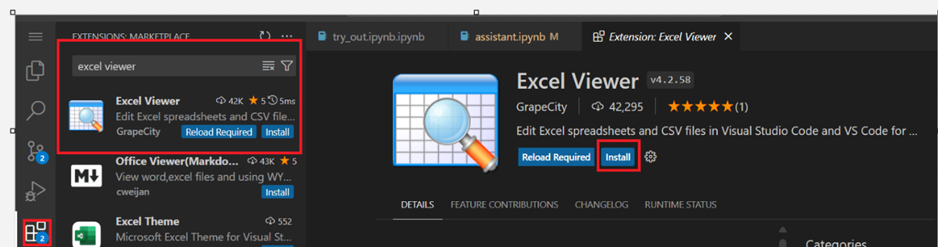